# Credentials für den Bilderkennungsdienst festlegen

Basierend auf [diesen](https://learn.microsoft.com/de-de/azure/cognitive-services/computer-vision/quickstarts-sdk/client-library?tabs=visual-studio&pivots=programming-language-rest-api) Artikel !

In [2]:
api_key = "geheim"
api_endpunkt = "tubilderkennung"
image_name = "cars.jpg"


# 1. API Aufruf

Mit dem ersten API Aufruf wird das Bild hochgeladen

In [3]:
import requests

files = [('file', (image_name, open(image_name, 'rb'), 'image/jpeg'))]
headers = {
    'Ocp-Apim-Subscription-Key': api_key
}
r2 = requests.post("https://"+api_endpunkt+".cognitiveservices.azure.com/vision/v3.2/read/analyze", files=files, headers=headers)
ol=r2.headers["Operation-Location"]
print(ol)

https://tubilderkennung.cognitiveservices.azure.com/vision/v3.2/read/analyzeResults/fce18e9d-3d3e-40f2-8574-5ea423ce3e55


# 2. Api Aufruf 

Mit dem 2. Request werden die Bilddaten abgerufen

In [4]:
import json
from urllib import response
import time

running=True

while running:
    time.sleep(1)
    r3 = requests.get(ol,headers=headers)
    mydata = json.loads(r3.text)

    if mydata["status"]=="succeeded":
        running=False


print(json.dumps(mydata, indent=4))


{
    "status": "succeeded",
    "createdDateTime": "2022-10-16T13:10:44Z",
    "lastUpdatedDateTime": "2022-10-16T13:10:45Z",
    "analyzeResult": {
        "version": "3.2.0",
        "modelVersion": "2022-04-30",
        "readResults": [
            {
                "page": 1,
                "angle": -0.8303,
                "width": 1478,
                "height": 1005,
                "unit": "pixel",
                "lines": [
                    {
                        "boundingBox": [
                            714,
                            532,
                            852,
                            531,
                            852,
                            558,
                            714,
                            561
                        ],
                        "text": "H.AP 515",
                        "appearance": {
                            "style": {
                                "name": "other",
                                "con

In [5]:
angle=mydata["analyzeResult"]["readResults"][0]["angle"]
lines = mydata["analyzeResult"]["readResults"][0]["lines"]#
print(json.dumps(lines, indent=4))


[
    {
        "boundingBox": [
            714,
            532,
            852,
            531,
            852,
            558,
            714,
            561
        ],
        "text": "H.AP 515",
        "appearance": {
            "style": {
                "name": "other",
                "confidence": 0.972
            }
        },
        "words": [
            {
                "boundingBox": [
                    715,
                    534,
                    788,
                    532,
                    788,
                    560,
                    715,
                    562
                ],
                "text": "H.AP",
                "confidence": 0.313
            },
            {
                "boundingBox": [
                    794,
                    532,
                    844,
                    532,
                    845,
                    559,
                    794,
                    560
                ],
                "tex

# Nun noch die Ergebnisse in das Bild eintragen

H.AP
515


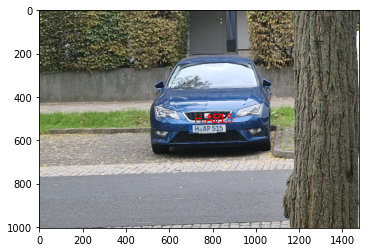

In [9]:
from turtle import color
import numpy as np
from matplotlib.pyplot import figure
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

im = Image.open(image_name)

# Create figure and axes
fig, ax = plt.subplots()
# Display the image
ax.imshow(im)

for line in lines:
    words = line["words"]
    for word in words:
        ar1 = np.array(word["boundingBox"])
        coord = np.reshape(ar1, (-1, 2))
        rect = patches.Polygon(coord, alpha=0.2)
        # Add the patch to the Axes
        ax.add_patch(rect)
        ax.text(ar1[0], ar1[1]-15, word["text"],rotation=-angle,color="red",size=12)
        print(word["text"])


plt.show()
